# Generating Areas of Interest (AOIs)
This notebook gives examples of generating AOIs from code and from raw gaze data.

## Contents:
[Generating AOIs from code](#Generating-AOIs-from-code)  
[...]()  
[...]()  

In [1]:
import scipy.ndimage
import matplotlib.pyplot as plt
from itrace_post import get_code_envelope, generate_code_mask

## Generating AOIs from code
The first step of this procedure is to generate a mask. 
Code is masked by eliminating whitespace. A logical numpy array is produced.

In [2]:
code_file = "sample-data/code-files/Space.java"

# Get the bounds of the file, in zero-indexed column/line numbers.
width, height = get_code_envelope(code_file)

print(width, height)

(78, 61)


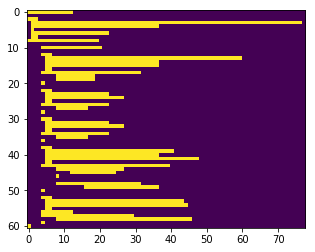

In [3]:
# Generate a code mask
code_mask = generate_code_mask(code_file, width, height)
plt.imshow(code_mask)
plt.show()

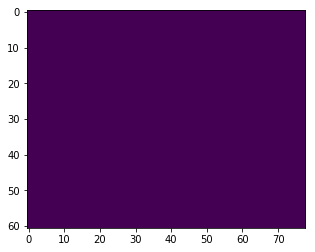

In [4]:
# Label individual features in the logical array
all_labels, num_features = scipy.ndimage.label(code_mask)
plt.imshow(all_labels)
plt.show()

You can match a fixation to any of these areas by checking the value in the `all_labels` array at any given line and column.